In [1]:
import threading
import multiprocessing
import numpy as np
import tensorflow as tf
#from AtariEnvironment import *
from SeaquestEnvironment import *
from ACERNetwork import * 
from ReplayBuffer import *
from Worker import * 
from Trainer import train,train_acer, test
import gym as gym
from time import sleep
from time import time
from utils import preprocess

network_t = "cnn"
GAME_NAME="Seaquest-v0"
#GAME_NAME = "LunarLander-v2"
TB_DIR = "saves/seaquest/final_R0/"
env=Seaquest_Environment(gym.make(GAME_NAME))
env2=gym.make(GAME_NAME)
#env = gym.make(GAME_NAME)
state= env.reset()
training_finished = False
LEARNING_RATE = 8e-5
print(env.action_space)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Discrete(18)


/home/juull100/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/juull100/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [2]:
session = tf.Session()
tf.reset_default_graph()

with tf.Session() as sess:
    with tf.device('/cpu:0'):
        G_Agent=ACERNetwork(sess,env,"global",network_type=network_t)
        agent = ACERNetwork(sess,env,str(0),G_Agent, network_type=network_t)
        sess.run(tf.global_variables_initializer())
        print(agent.get_pi(state))
        print(G_Agent.get_pi(state))
        agent.update_target()
        print(agent.get_pi(state))
        print(G_Agent.get_pi(state))


/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[[0.05538173 0.05628235 0.05373008 0.05738406 0.06047516 0.05492027
  0.05471828 0.05280162 0.0508952  0.05400984 0.05427533 0.05784094
  0.06267966 0.05620741 0.05454499 0.05309907 0.0557992  0.05495477]]
[[0.0557004  0.05272225 0.05729368 0.05652955 0.05339579 0.05550925
  0.05585336 0.05494371 0.05674365 0.05760376 0.05572307 0.05360806
  0.05615005 0.05577984 0.05497103 0.05634213 0.05434184 0.05678855]]
[[0.0557004  0.05272225 0.05729368 0.05652955 0.05339579 0.05550925
  0.05585336 0.05494371 0.05674365 0.05760376 0.05572307 0.05360806
  0.05615005 0.05577984 0.05497103 0.05634213 0.05434184 0.05678855]]
[[0.0557004  0.05272225 0.05729368 0.05652955 0.05339579 0.05550925
  0.05585336 0.05494371 0.05674365 0.05760376 0.05572307 0.05360806
  0.05615005 0.05577984 0.05497103 0.05634213 0.05434184 0.05678855]]


/home/juull100/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/juull100/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


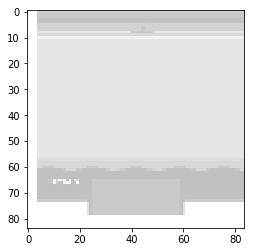

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
s1 = env.reset()
s2 = env2.reset()
plt.imshow(s1)


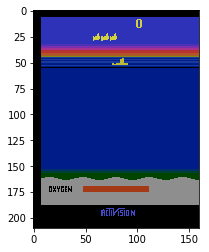

In [4]:
plt.imshow(s2)

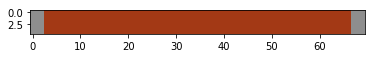

In [5]:
plt.imshow(s2[170:175,45:115])

In [6]:
print(s2[170:175].shape)

(5, 160, 3)
